## Notebook for looking at statistics of data

In [22]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import omg
from omg import mapedit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
dataset_dir = "/data/wadld/data/"
df_name = "dataset/all_wads.pkl"

In [24]:
df = pd.read_pickle(os.path.join(dataset_dir, df_name))

In [25]:
print(df.columns)
good_wads = df.loc[df.average_rating > 4.0]
wad_files = list(filter(os.path.exists, [os.path.join(dataset_dir, x) for x in list(sum(good_wads.wad_file, []))]))

Index(['special_type', 'zip_location', 'votes', 'average_rating', 'title',
       'success', 'wad_file', 'dir_location', 'reviews', 'description',
       'name'],
      dtype='object')


In [26]:
set([os.path.splitext(x)[1] for x in wad_files])

{'.WAD', '.wad'}

In [27]:
tic = time.time()
map_counts = []
linedef_counts = []
for idx, wad_file in enumerate(wad_files):
    innertic = time.time()
    wad = omg.WAD()
    try:
        wad.from_file(wad_file)
        mapc = len(wad.maps)
        linedefc = []
        for map_name in wad.maps.keys():
            map_obj = mapedit.MapEditor(wad.maps[map_name])
            linedefc.append(len(map_obj.linedefs))
        map_counts.append(mapc)
        linedef_counts.append(linedefc)
    except:
        map_counts.append(0)
        linedef_counts.append([])
        continue

    
    print("[{}] {}: {}".format(idx, wad_file, time.time() - innertic))
print("Iterating through good wads took {}".format(time.time() - tic))

[0] /data/wadld/data/dataset/1killxtr_0/EX.WAD: 0.030745744705200195
[1] /data/wadld/data/dataset/3tricks_0/3TRICKS.WAD: 0.025456666946411133
[2] /data/wadld/data/dataset/900deep_0/900deep.wad: 0.041314125061035156
[3] /data/wadld/data/dataset/1fifrmx_0/1fifrmx.wad: 0.12079620361328125
[4] /data/wadld/data/dataset/aa_e1_0/AA_E1.wad: 1.5596985816955566
[5] /data/wadld/data/dataset/b79soe_0/b79soe.wad: 0.9036834239959717
[6] /data/wadld/data/dataset/betalabs_0/BETALABS.wad: 0.8327455520629883
[7] /data/wadld/data/dataset/borax4_0/BORAX4.WAD: 0.18177127838134766
[8] /data/wadld/data/dataset/cbspeed_0/cbspeed.wad: 0.6067514419555664
[9] /data/wadld/data/dataset/cerdeath_0/CerDeath.wad: 0.1271989345550537
[10] /data/wadld/data/dataset/class_e2_0/class_e2.wad: 0.4987061023712158
[11] /data/wadld/data/dataset/cqad_0/cqad.wad: 0.42150092124938965
[12] /data/wadld/data/dataset/cybrtowr_0/cybrtowr.wad: 0.015398740768432617
[13] /data/wadld/data/dataset/dai-wood_0/wood.wad: 0.1493542194366455
[14

[116] /data/wadld/data/dataset/db_opost_0/db_opost.WAD: 0.04892230033874512
[117] /data/wadld/data/dataset/ddvu_0/ddvu.wad: 0.4957602024078369
[118] /data/wadld/data/dataset/deadbs10_0/DEADBASE.WAD: 0.0465395450592041
[119] /data/wadld/data/dataset/djw11wad_0/DJW11.WAD: 0.02418994903564453
[120] /data/wadld/data/dataset/dl_polar_0/DL_POLAR.WAD: 0.12437653541564941
[121] /data/wadld/data/dataset/dmcarn20_0/IRU2-V2.WAD: 0.04630255699157715
[122] /data/wadld/data/dataset/dmcos_0/KILL.WAD: 0.03433966636657715
[123] /data/wadld/data/dataset/dmcos_0/ENGINE.WAD: 0.030947208404541016
[124] /data/wadld/data/dataset/dmcpho_0/CPDEMO16.WAD: 0.0008420944213867188
[125] /data/wadld/data/dataset/dmcpho_0/CPHOBOS3.WAD: 0.37818241119384766
[126] /data/wadld/data/dataset/dmdeg1_0/DEGENRTE.WAD: 0.0962979793548584
[127] /data/wadld/data/dataset/dmfred_0/DMFRED.WAD: 0.023524999618530273
[128] /data/wadld/data/dataset/dmhorr_0/HORROR.WAD: 0.013308286666870117
[129] /data/wadld/data/dataset/dmjon_0/DMJON.WAD

[231] /data/wadld/data/dataset/concern_0/concern.wad: 3.0168628692626953
[232] /data/wadld/data/dataset/dtwid_0/DTWID.wad: 1.4073233604431152
[233] /data/wadld/data/dataset/inva_19_0/INVASION.WAD: 1.5961477756500244
[234] /data/wadld/data/dataset/niveles_0/NIVELES.WAD: 0.8834366798400879
[235] /data/wadld/data/dataset/njdoom_0/NJDOOM1.WAD: 1.1164178848266602
[236] /data/wadld/data/dataset/nmdu_0/nmdu.wad: 0.8866395950317383
[237] /data/wadld/data/dataset/wd12_0/WD12.WAD: 1.6270511150360107
[238] /data/wadld/data/dataset/pagbspd3_0/pagbspd3.wad: 0.1626904010772705
[239] /data/wadld/data/dataset/pc94-33_0/pc94-33.wad: 0.06229877471923828
[240] /data/wadld/data/dataset/pcfcont_0/PCFCONT.WAD: 0.049635887145996094
[241] /data/wadld/data/dataset/pd-base_0/pd-base.wad: 0.061933040618896484
[242] /data/wadld/data/dataset/pdsp14_0/pdsp14.wad: 0.16799187660217285
[243] /data/wadld/data/dataset/pdsp15_0/Pdsp15.wad: 0.32201218605041504
[244] /data/wadld/data/dataset/pe1_tox_0/Pe1_tox.wad: 0.062861

[343] /data/wadld/data/dataset/anhs_0/anhs.wad: 0.4313032627105713
[344] /data/wadld/data/dataset/ap_012_0/ap_012.wad: 0.033411502838134766
[345] /data/wadld/data/dataset/aqueenv3_0/aqueenv3.wad: 1.6698040962219238
[346] /data/wadld/data/dataset/artica2_0/ARTICA2.WAD: 0.042638540267944336
[347] /data/wadld/data/dataset/artica4_0/artica4.wad: 0.06473135948181152
[348] /data/wadld/data/dataset/asgarden_0/asgarden.wad: 0.24642443656921387
[349] /data/wadld/data/dataset/ash2ash_0/ASH2ASH.WAD: 0.3631131649017334
[350] /data/wadld/data/dataset/aslgeup_0/aslgeup.wad: 0.8175163269042969
[351] /data/wadld/data/dataset/assi_d_0/assi_d.wad: 0.06007671356201172
[352] /data/wadld/data/dataset/aveterra_0/AveTerra.wad: 0.0017628669738769531
[353] /data/wadld/data/dataset/awaken_0/AWAKEN.WAD: 0.06245851516723633
[354] /data/wadld/data/dataset/axiom_0/axiom.wad: 0.6096856594085693
[355] /data/wadld/data/dataset/azgthth_0/AZGTHTH4.wad: 0.8478295803070068
[356] /data/wadld/data/dataset/aztec666_0/aztec66

[454] /data/wadld/data/dataset/dtcademo_0/dtca_demo.wad: 1.2647671699523926
[455] /data/wadld/data/dataset/dtcamlft_0/dtca_mlifta.wad: 0.4314444065093994
[456] /data/wadld/data/dataset/dubai_0/dubai_up.wad: 0.48021817207336426
[457] /data/wadld/data/dataset/dv_0/DV.wad: 2.077232599258423
[458] /data/wadld/data/dataset/dvii-1i_0/data/DVII-1i.wad: 6.798788070678711
[459] /data/wadld/data/dataset/dwforums_0/dwforums.wad: 0.020987510681152344
[460] /data/wadld/data/dataset/dwforums2_0/dwforums2.wad: 0.009092092514038086
[461] /data/wadld/data/dataset/dwrftown_0/dwrftown.wad: 0.17473173141479492
[462] /data/wadld/data/dataset/dwspd001_0/dwspd001.wad: 0.1544632911682129
[463] /data/wadld/data/dataset/e6y3_0/e6y3.wad: 0.2753720283508301
[464] /data/wadld/data/dataset/eaeuro01_0/eaEuro01.wad: 0.4903717041015625
[465] /data/wadld/data/dataset/eaeuro03_0/eaeuro03.wad: 0.5984971523284912
[466] /data/wadld/data/dataset/easpd3_0/EASPD3.WAD: 0.04006767272949219
[467] /data/wadld/data/dataset/ebola_1

[565] /data/wadld/data/dataset/inworld_0/inworld.wad: 0.2806851863861084
[566] /data/wadld/data/dataset/iogw_0/iogw.wad: 0.5970058441162109
[567] /data/wadld/data/dataset/isis_0/ISIS.WAD: 0.32616448402404785
[568] /data/wadld/data/dataset/island_1/island.wad: 0.5267863273620605
[569] /data/wadld/data/dataset/itdoom1_0/itdoom1.wad: 2.5894954204559326
[570] /data/wadld/data/dataset/itwas_0/itwas.wad: 0.08483147621154785
[571] /data/wadld/data/dataset/ja_xmas_0/ja_xmas.wad: 0.024601459503173828
[572] /data/wadld/data/dataset/jadearth_0/jadearth.wad: 1.1635494232177734
[573] /data/wadld/data/dataset/jet01_0/jet01.wad: 0.21178865432739258
[574] /data/wadld/data/dataset/jnte_rmk_0/jnte_rmk.wad: 0.14530611038208008
[576] /data/wadld/data/dataset/jthdemo_0/jthdemo.wad: 0.33844852447509766
[577] /data/wadld/data/dataset/jungle_0/jungle.wad: 0.042458295822143555
[578] /data/wadld/data/dataset/k_bd_0/k_bd.wad: 0.07367658615112305
[579] /data/wadld/data/dataset/k_kickin_0/kickin01.wad: 0.241547822

[678] /data/wadld/data/dataset/one1_0/ONE1.wad: 0.23231291770935059
[679] /data/wadld/data/dataset/oneweek_0/ONEWEEK.WAD: 0.6923468112945557
[680] /data/wadld/data/dataset/oniria2_0/oniria2.wad: 0.3307211399078369
[681] /data/wadld/data/dataset/onslght_0/Onslght.wad: 2.114332675933838
[682] /data/wadld/data/dataset/opdes_0/opdes.wad: 0.12395215034484863
[683] /data/wadld/data/dataset/os3_0/OS3.wad: 0.611018180847168
[684] /data/wadld/data/dataset/outmyass_0/Outmyass.wad: 0.09034967422485352
[685] /data/wadld/data/dataset/overdose_0/Overdose.wad: 1.393054485321045
[686] /data/wadld/data/dataset/1024clau_0/1024CLAU.wad: 4.644056558609009
[687] /data/wadld/data/dataset/1994tu_0/1994TU.wad: 6.669995307922363
[688] /data/wadld/data/dataset/32in2414_0/32in24-14.wad: 6.5629260540008545
[689] /data/wadld/data/dataset/3hafinal_0/3hafinal.wad: 1.380310297012329
[690] /data/wadld/data/dataset/aaliens_0/aaliens.wad: 11.949386358261108
[691] /data/wadld/data/dataset/alt_0/alt.wad: 8.694090366363525

[793] /data/wadld/data/dataset/scl_top_0/scl_top.wad: 1.5582139492034912
[794] /data/wadld/data/dataset/scmain_0/SCTex.wad: 0.02723550796508789
[795] /data/wadld/data/dataset/scmain_0/SCMonstr.wad: 0.055173397064208984
[796] /data/wadld/data/dataset/scmain_0/SCMain.wad: 3.1581389904022217
[797] /data/wadld/data/dataset/scmain_0/SCmusic.wad: 0.0321195125579834
[798] /data/wadld/data/dataset/scmain_0/SCHUD.wad: 0.013545751571655273
[799] /data/wadld/data/dataset/scmn12_0/SCMN12.wad: 3.5572006702423096
[800] /data/wadld/data/dataset/scythex_0/scythex.wad: 1.5565168857574463
[801] /data/wadld/data/dataset/se_0/SE.wad: 0.7090048789978027
[802] /data/wadld/data/dataset/secur2_0/s02.wad: 0.14891672134399414
[803] /data/wadld/data/dataset/secur2_0/s01.wad: 0.1224052906036377
[804] /data/wadld/data/dataset/secur2_0/s03.wad: 0.2594451904296875
[805] /data/wadld/data/dataset/secur2_0/secur2.wad: 0.00905752182006836
[806] /data/wadld/data/dataset/sigma_0/sigma/sigma.wad: 0.33357954025268555
[807] 

[905] /data/wadld/data/dataset/vordakk_0/vordakk.wad: 0.3316531181335449
[906] /data/wadld/data/dataset/vrack2_0/vrack2.wad: 0.4902827739715576
[907] /data/wadld/data/dataset/vrack2b_0/vrack2b.wad: 0.5867581367492676
[908] /data/wadld/data/dataset/vrack3_0/vrack3.wad: 0.6117129325866699
[909] /data/wadld/data/dataset/vrgl_3t_0/VRGL_3T.WAD: 0.06716799736022949
[910] /data/wadld/data/dataset/vv_0/vv.WAD: 1.4334521293640137
[911] /data/wadld/data/dataset/vv2_0/vv2.wad: 1.2757470607757568
[912] /data/wadld/data/dataset/wareevil_0/wareevil.wad: 0.05941581726074219
[913] /data/wadld/data/dataset/warlh_0/WarlH.wad: 1.0437047481536865
[914] /data/wadld/data/dataset/washbld_0/Washbld.WAD: 0.11852836608886719
[915] /data/wadld/data/dataset/wastedt_0/WastedT.wad: 0.08261609077453613
[916] /data/wadld/data/dataset/watrsp_0/watrsp.wad: 2.0513548851013184
[917] /data/wadld/data/dataset/weirdo_0/weirdo.wad: 0.14774656295776367
[918] /data/wadld/data/dataset/whitemar_0/whitemar.wad: 3.3275153636932373

[1019] /data/wadld/data/dataset/cjzwad_0/CJZWAD.WAD: 0.12181735038757324
[1020] /data/wadld/data/dataset/cocta_0/COCTA.WAD: 0.16994929313659668
[1021] /data/wadld/data/dataset/cofd2_0/COFDS.WAD: 0.004290103912353516
[1022] /data/wadld/data/dataset/cofd2_0/COFD2.WAD: 0.06457972526550293
[1023] /data/wadld/data/dataset/commando_0/Commando.WAD: 0.3516535758972168
[1024] /data/wadld/data/dataset/continue_0/CONTINUE.WAD: 0.029038667678833008
[1025] /data/wadld/data/dataset/coopq1_0/COOPQ1.WAD: 0.2171769142150879
[1026] /data/wadld/data/dataset/cotl10_0/CL10MUS.WAD: 0.0015454292297363281
[1027] /data/wadld/data/dataset/cotl10_0/MSCL10.WAD: 0.2965826988220215
[1028] /data/wadld/data/dataset/cradle_0/CRADLE-1.WAD: 0.04851174354553223
[1029] /data/wadld/data/dataset/cross2_0/Cross.wad: 0.09501194953918457
[1030] /data/wadld/data/dataset/crush_1/CRUSH.WAD: 0.13320446014404297
[1031] /data/wadld/data/dataset/cyberfun_0/CYBERFUN.WAD: 0.3687307834625244
[1032] /data/wadld/data/dataset/cyc-b_0/cyc-b

[1129] /data/wadld/data/dataset/fthls2_0/FTHL4.WAD: 0.09244513511657715
[1130] /data/wadld/data/dataset/fury_0/FURY.WAD: 0.3812127113342285
[1131] /data/wadld/data/dataset/future_0/FUTURE.WAD: 0.06745028495788574
[1132] /data/wadld/data/dataset/fwater_0/FWATER.WAD: 0.15563702583312988
[1133] /data/wadld/data/dataset/01mkstnd_0/01MKSTND.WAD: 0.02280116081237793
[1134] /data/wadld/data/dataset/0dandy01_0/DANDY01.WAD: 0.012959957122802734
[1135] /data/wadld/data/dataset/0sentnl_0/#SENTNL.WAD: 0.032540321350097656
[1136] /data/wadld/data/dataset/1dwangol_0/1dwangol.wad: 0.3128838539123535
[1137] /data/wadld/data/dataset/2spook35_0/2SPOOK35.WAD: 0.24649333953857422
[1138] /data/wadld/data/dataset/4block_0/4BLOCKD2.WAD: 0.0029888153076171875
[1139] /data/wadld/data/dataset/4block_0/4BLOCK.WAD: 0.0021512508392333984
[1140] /data/wadld/data/dataset/6skuls02_0/6SKULS02.WAD: 0.12937569618225098
[1141] /data/wadld/data/dataset/6skuls02_0/6SOUNDS.WAD: 0.0005435943603515625
[1142] /data/wadld/data/

[1241] /data/wadld/data/dataset/t2k3demo_0/t2k3demo.WAD: 0.09842872619628906
[1242] /data/wadld/data/dataset/td_dm1_0/td_dm1.wad: 0.030402183532714844
[1243] /data/wadld/data/dataset/threshold_0/Threshold.wad: 0.1796126365661621
[1244] /data/wadld/data/dataset/titmilk_0/titmilk.wad: 0.032094478607177734
[1245] /data/wadld/data/dataset/tlsxctf1_0/tlsxctf1.wad: 0.8962070941925049
[1246] /data/wadld/data/dataset/toxdm1_0/toxdm1.wad: 0.04992485046386719
[1247] /data/wadld/data/dataset/toxicpit_0/Toxic Pit.wad: 0.02834606170654297
[1248] /data/wadld/data/dataset/vdmsetr1_0/vdmset_r1.wad: 0.6796178817749023
[1249] /data/wadld/data/dataset/winterdm_0/winterdm.wad: 0.2520124912261963
[1250] /data/wadld/data/dataset/wogan_0/Wogan.wad: 0.01665806770324707
[1251] /data/wadld/data/dataset/zctc_0/zctc.wad: 0.0017032623291015625
[1252] /data/wadld/data/dataset/zctc_0/zctcmaps.wad: 0.24640536308288574
[1253] /data/wadld/data/dataset/zdctfmp_0/zdctfmp.wad: 0.6920068264007568
[1254] /data/wadld/data/da

[1352] /data/wadld/data/dataset/flegm_0/FLEGM.WAD: 0.05765032768249512
[1353] /data/wadld/data/dataset/foothold_0/FOOTHOLD.WAD: 0.01937270164489746
[1354] /data/wadld/data/dataset/forever_0/Forever.wad: 0.0494837760925293
[1355] /data/wadld/data/dataset/fortress_1/FORTRESS.WAD: 0.03440666198730469
[1356] /data/wadld/data/dataset/fox1dm_0/FOXDM1.WAD: 0.014099597930908203
[1357] /data/wadld/data/dataset/fracture_0/fracture.wad: 0.1882460117340088
[1358] /data/wadld/data/dataset/frogfrag_0/Frogfrag.wad: 0.05341339111328125
[1359] /data/wadld/data/dataset/funeral2_0/FUNERAL2.WAD: 0.014996767044067383
[1360] /data/wadld/data/dataset/fwf_aztc_0/fwf_aztc.wad: 0.1495964527130127
[1361] /data/wadld/data/dataset/gambler_0/GAMBLER.WAD: 0.028047561645507812
[1362] /data/wadld/data/dataset/garbage_1/GARBAGE.WAD: 0.00791025161743164
[1363] /data/wadld/data/dataset/genius02_0/GENIUS02.WAD: 0.015477418899536133
[1364] /data/wadld/data/dataset/gigakill_0/GIGAKILL.WAD: 0.07738709449768066
[1365] /data/w

[1462] /data/wadld/data/dataset/tlr-ii_0/LAST.WAD: 0.2840743064880371
[1463] /data/wadld/data/dataset/tlr-ii_0/RESORT0.WAD: 0.015702486038208008
[1464] /data/wadld/data/dataset/tombdark_0/TOMBDARK.WAD: 0.016009807586669922
[1465] /data/wadld/data/dataset/tool_0/TOOL.WAD: 0.11669564247131348
[1466] /data/wadld/data/dataset/torment_0/Torment.wad: 0.033422231674194336
[1467] /data/wadld/data/dataset/trap_0/TRAP.WAD: 0.0419926643371582
[1468] /data/wadld/data/dataset/truck_0/TRUCK.WAD: 0.0177304744720459
[1469] /data/wadld/data/dataset/tsunami1_0/TSUNAMI1.WAD: 0.013918161392211914
[1470] /data/wadld/data/dataset/unholyd1_0/UNHOLYD1.WAD: 0.019780874252319336
[1471] /data/wadld/data/dataset/upsidown_0/UPSIDOWN.WAD: 0.010154485702514648
[1472] /data/wadld/data/dataset/vdpak1_0/VDPAK1.WAD: 0.17232036590576172
[1473] /data/wadld/data/dataset/vicious_0/VICIOUS.WAD: 0.27689290046691895
[1474] /data/wadld/data/dataset/vroom_0/VROOM.WAD: 0.009537458419799805
[1475] /data/wadld/data/dataset/waahh31_

[1573] /data/wadld/data/dataset/maihama_0/MAIHAMA.WAD: 0.11838960647583008
[1574] /data/wadld/data/dataset/malgnant_0/MALGNANT.WAD: 0.05285906791687012
[1575] /data/wadld/data/dataset/mangle_0/MANGLE.WAD: 0.039086103439331055
[1576] /data/wadld/data/dataset/map18mem_0/map18mem.wad: 0.0658113956451416
[1577] /data/wadld/data/dataset/marduk_0/MARDUK.WAD: 0.13871288299560547
[1578] /data/wadld/data/dataset/marduk2_0/MARDUK.WAD: 0.05224156379699707
[1579] /data/wadld/data/dataset/marfoly_0/MarFoly.wad: 0.05621743202209473
[1580] /data/wadld/data/dataset/marksdm2_0/TEK.WAD: 0.040436506271362305
[1581] /data/wadld/data/dataset/marksdm2_0/MANSION.WAD: 0.05694103240966797
[1582] /data/wadld/data/dataset/marksdm2_0/EGYPT.WAD: 0.149216890335083
[1583] /data/wadld/data/dataset/marksdm2_0/CASTLE.WAD: 0.1305539608001709
[1584] /data/wadld/data/dataset/marksdm2_0/FORTRESS.WAD: 0.11875247955322266
[1585] /data/wadld/data/dataset/meinhaus_0/MEINHAUS.WAD: 0.13129377365112305
[1586] /data/wadld/data/dat

[1686] /data/wadld/data/dataset/prwrangl_0/prwrangl.wad: 0.10391521453857422
[1687] /data/wadld/data/dataset/prwrcol2_0/PRWRCOL2.WAD: 0.2877686023712158
[1688] /data/wadld/data/dataset/prwrnxs6_0/PRWRNXS6.WAD: 0.05010223388671875
[1689] /data/wadld/data/dataset/prwrsv01_0/PRWRSV01.WAD: 0.018917560577392578
[1690] /data/wadld/data/dataset/prwrsv02_0/PRWRSV02.WAD: 0.026636362075805664
[1691] /data/wadld/data/dataset/punishr_0/PUNISHER.WAD: 0.024251461029052734
[1692] /data/wadld/data/dataset/pyro2_0/PYRO2.WAD: 0.02544093132019043
[1693] /data/wadld/data/dataset/quikisg2_0/QUIKISG2.WAD: 0.07448053359985352
[1694] /data/wadld/data/dataset/rambleon_0/RAMBLEON.WAD: 0.03465461730957031
[1695] /data/wadld/data/dataset/rampv2en_0/RampV2EN.wad: 0.2583153247833252
[1696] /data/wadld/data/dataset/rbbthole_0/RBBTHOLE.WAD: 0.06600713729858398
[1697] /data/wadld/data/dataset/reactrfv_0/REACTRFV.WAD: 0.08223652839660645
[1698] /data/wadld/data/dataset/reboot_0/REBOOT.WAD: 0.027417898178100586
[1699] /

[1800] /data/wadld/data/dataset/thecryp2_0/thecrypt.wad: 0.039342641830444336
[1801] /data/wadld/data/dataset/thegate_0/TheGate.wad: 0.0955498218536377
[1802] /data/wadld/data/dataset/thekeep_1/THEKEEP.WAD: 0.02007436752319336
[1803] /data/wadld/data/dataset/thelord_0/THELORD.WAD: 0.0951545238494873
[1804] /data/wadld/data/dataset/therion_0/THERION.WAD: 0.06750655174255371
[1805] /data/wadld/data/dataset/tomb_0/tomb.wad: 0.0311431884765625
[1806] /data/wadld/data/dataset/tomsroad_0/tomsroad.wad: 0.7204842567443848
[1807] /data/wadld/data/dataset/torment_1/TORMENT.WAD: 0.14385414123535156
[1808] /data/wadld/data/dataset/tqmap02_0/TQMAP2.WAD: 0.12208127975463867
[1809] /data/wadld/data/dataset/tr_lvl11_0/TR_LVL11.wad: 0.11948728561401367
[1810] /data/wadld/data/dataset/trydent_0/trydent.wad: 0.026547670364379883
[1811] /data/wadld/data/dataset/ttp-rp_0/TTP.WAD: 0.546295166015625
[1812] /data/wadld/data/dataset/ttp-rp_0/TTPDEATH.WAD: 0.03559160232543945
[1813] /data/wadld/data/dataset/ttp

(array([1.264e+03, 8.200e+01, 5.000e+01, 3.800e+01, 3.000e+01, 2.900e+01,
        3.800e+01, 2.300e+01, 5.800e+01, 3.200e+01, 3.800e+01, 1.200e+01,
        6.000e+00, 5.000e+00, 2.000e+00, 7.000e+00, 8.000e+00, 6.000e+00,
        6.000e+00, 5.000e+00, 9.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        7.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 1.000e+00, 5.900e+01,
        1.200e+01, 4.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ,
        12.1, 13.2, 14.3, 15.4, 16.5, 17.6, 18.7, 19.8, 20.9, 22. , 23.1,
        24.2, 25.3, 26.4, 27.5, 28.6, 29.7, 30.8, 31.9, 33. , 34.1, 35.2,
        36.3, 37.4, 38.5, 39.6, 40.7, 41.8, 42.9, 44. , 45.1, 46.2, 47.3,
        48.4, 49.5, 50.6, 51.7, 52.8, 53.9, 55. ]),
 <a list of 50 Patch objects

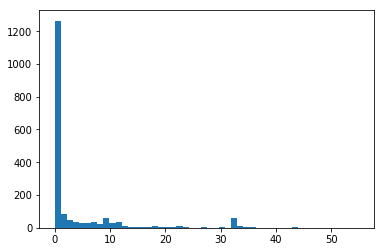

In [28]:
plt.hist(map_counts, bins=50)

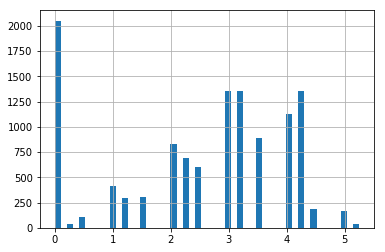

In [29]:
df.average_rating.hist(bins=50)

In [30]:
ok_wads = df.loc[df.average_rating > 3.0]
ok_wad_files = list(filter(os.path.exists, [os.path.join(dataset_dir, x) for x in list(sum(ok_wads.wad_file, []))]))
tic = time.time()
ok_map_counts = []
ok_linedef_counts = []
for idx, wad_file in enumerate(ok_wad_files):
    innertic = time.time()
    wad = omg.WAD()
    try:
        wad.from_file(wad_file)
        mapc = len(wad.maps)
        linedefc = []
        for map_name in wad.maps.keys():
            map_obj = mapedit.MapEditor(wad.maps[map_name])
            linedefc.append(len(map_obj.linedefs))
        ok_map_counts.append(mapc)
        ok_linedef_counts.append(linedefc)
    except:
        ok_map_counts.append(0)
        ok_linedef_counts.append([])
        continue

    print("[{}] {}: {}".format(idx, wad_file, time.time() - innertic))
print("Iterating through good wads took {}".format(time.time() - tic))

[0] /data/wadld/data/dataset/0_0/0.WAD: 0.04019904136657715
[1] /data/wadld/data/dataset/01fava_0/FAVA.WAD: 0.31227755546569824
[2] /data/wadld/data/dataset/01fava_0/CRAP115.WAD: 0.030559301376342773
[3] /data/wadld/data/dataset/02what_0/02WHAT.WAD: 0.014226198196411133
[4] /data/wadld/data/dataset/10years_0/10years.wad: 0.23976397514343262
[5] /data/wadld/data/dataset/11fortko_0/11FORTKO.WAD: 0.0390470027923584
[6] /data/wadld/data/dataset/11space_0/11SPACE.WAD: 0.033469200134277344
[7] /data/wadld/data/dataset/1_on_1_0/1_ON_1.WAD: 0.05126357078552246
[8] /data/wadld/data/dataset/1fiffy7_0/FIFFY7.WAD: 0.10269570350646973
[9] /data/wadld/data/dataset/1killxtr_0/EX.WAD: 0.02615809440612793
[10] /data/wadld/data/dataset/1pois1_0/!POIS!.WAD: 0.025603055953979492
[11] /data/wadld/data/dataset/1sttry_0/1STTRY.WAD: 0.020710468292236328
[12] /data/wadld/data/dataset/21ratmaz_0/21ratmaz.wad: 0.06180262565612793
[13] /data/wadld/data/dataset/22ventry_0/22SPRITE.WAD: 0.009767770767211914
[14] /d

[114] /data/wadld/data/dataset/oskyrt2_0/oskyrt2.wad: 0.7222461700439453
[115] /data/wadld/data/dataset/2002ad10_0/2002ad10.wad: 2.8220036029815674
[116] /data/wadld/data/dataset/2002ado_0/2002ado.wad: 2.609422206878662
[117] /data/wadld/data/dataset/chexgc_0/chexgc/chexgc.wad: 0.1558542251586914
[118] /data/wadld/data/dataset/ddamn0.9_0/DDAMN0.9.wad: 1.48283052444458
[119] /data/wadld/data/dataset/demise1_0/demise1.wad: 2.1175029277801514
[120] /data/wadld/data/dataset/dtwid-le_0/DTWID-LX.wad: 0.4270286560058594
[121] /data/wadld/data/dataset/dtwid-le_0/DTWID-E5.wad: 0.38974595069885254
[122] /data/wadld/data/dataset/dtwid-le_0/DTWID-LE.wad: 2.228666067123413
[124] /data/wadld/data/dataset/neis_0/NEIS.wad: 4.322179317474365
[125] /data/wadld/data/dataset/par-lutz_0/PAR.wad: 5.364868879318237
[126] /data/wadld/data/dataset/pc_hellk_0/pc_hellk.wad: 0.07728004455566406
[127] /data/wadld/data/dataset/pd18_0/PARALLEL.WAD: 0.7441809177398682
[128] /data/wadld/data/dataset/pe1_phob_0/pe1_pho

[228] /data/wadld/data/dataset/bastard3_0/BASTARD3.WAD: 0.1639845371246338
[229] /data/wadld/data/dataset/bcdeath3_0/BCDEATH3.WAD: 0.02605152130126953
[230] /data/wadld/data/dataset/bdw_0/BDW.WAD: 0.1521601676940918
[231] /data/wadld/data/dataset/bedlam_0/Bedlam.wad: 0.5684788227081299
[232] /data/wadld/data/dataset/beehive2_0/beehive2.wad: 0.030252456665039062
[233] /data/wadld/data/dataset/belishac_0/belisha_c.wad: 0.20702123641967773
[234] /data/wadld/data/dataset/ben_0/BEN.WAD: 0.05050253868103027
[235] /data/wadld/data/dataset/beyv1_0/beyv1.wad: 0.5953924655914307
[236] /data/wadld/data/dataset/bfr_1995_0/bfr_1995.wad: 0.03983187675476074
[237] /data/wadld/data/dataset/bge2_0/bge2.wad: 0.693289041519165
[238] /data/wadld/data/dataset/bgnymd_0/bgnymd.wad: 0.5683062076568604
[239] /data/wadld/data/dataset/bigtrap_0/BIGTRAP.WAD: 0.033209800720214844
[240] /data/wadld/data/dataset/bilbo11_0/BILBO11.WAD: 0.02926921844482422
[241] /data/wadld/data/dataset/bitedst2_0/BITEDUST.WAD: 0.0192

[343] /data/wadld/data/dataset/debut_ep_0/DEBUT.WAD: 0.5802886486053467
[344] /data/wadld/data/dataset/deiminma_0/deiminma.wad: 0.16670656204223633
[345] /data/wadld/data/dataset/deimos_0/E1M1.WAD: 0.010708332061767578
[346] /data/wadld/data/dataset/deimos_0/E1M2.WAD: 0.021135807037353516
[347] /data/wadld/data/dataset/deimoscc_0/DeimosCC.wad: 0.035239219665527344
[348] /data/wadld/data/dataset/demon13_0/DEMONS!S.WAD: 0.024973630905151367
[349] /data/wadld/data/dataset/demonse_0/DEMONS!S.WAD: 0.02499532699584961
[350] /data/wadld/data/dataset/despar12_0/DESPAIR.WAD: 0.12876057624816895
[351] /data/wadld/data/dataset/dethflow_0/DETHFLOW.WAD: 0.08942914009094238
[352] /data/wadld/data/dataset/deum_0/DEUM.WAD: 0.025720834732055664
[353] /data/wadld/data/dataset/digimort_0/BITEBWAD.WAD: 0.029293298721313477
[354] /data/wadld/data/dataset/dimgate_0/DIMGATE.WAD: 0.1334683895111084
[355] /data/wadld/data/dataset/dinner_0/DINNER.WAD: 0.4277324676513672
[356] /data/wadld/data/dataset/dis_0/DIS.

[458] /data/wadld/data/dataset/elements_1/ELEMENTS.WAD: 0.17861390113830566
[459] /data/wadld/data/dataset/elfstomp_0/Elfstomp.wad: 0.1585993766784668
[460] /data/wadld/data/dataset/elrond_0/ELROND.WAD: 0.07232189178466797
[461] /data/wadld/data/dataset/empire_0/EMPIRE4.WAD: 0.0300445556640625
[462] /data/wadld/data/dataset/empire_0/EMPIRE2.WAD: 0.040424346923828125
[463] /data/wadld/data/dataset/empire_0/EMPIRE1.WAD: 0.03558230400085449
[464] /data/wadld/data/dataset/empire_0/EMPIRE3.WAD: 0.09259343147277832
[465] /data/wadld/data/dataset/end1_0/END_SND.WAD: 0.0007650852203369141
[466] /data/wadld/data/dataset/end1_0/END1.WAD: 0.676983118057251
[467] /data/wadld/data/dataset/epi-hell_0/EPI-HELL.WAD: 0.3295013904571533
[468] /data/wadld/data/dataset/epi2best_0/EPI2BEST.WAD: 0.26299571990966797
[469] /data/wadld/data/dataset/equino-x_0/LWFIRST.WAD: 0.32619690895080566
[470] /data/wadld/data/dataset/escape3_0/ESCAPE.WAD: 0.03703165054321289
[471] /data/wadld/data/dataset/eternity_0/ETERM

[571] /data/wadld/data/dataset/tlr_0/LAST.WAD: 0.27015018463134766
[572] /data/wadld/data/dataset/tlr_0/RESORT0.WAD: 0.010155439376831055
[573] /data/wadld/data/dataset/tourney_0/TOURNEY.WAD: 0.01634693145751953
[574] /data/wadld/data/dataset/treedm1_0/TREEDM1.WAD: 0.04824995994567871
[575] /data/wadld/data/dataset/trunk_0/TRUNK.WAD: 0.022631168365478516
[576] /data/wadld/data/dataset/uacmeat_0/uacmeat.wad: 0.0460817813873291
[577] /data/wadld/data/dataset/udd_0/udd.wad: 0.020889759063720703
[578] /data/wadld/data/dataset/usq2_0/USQ2.WAD: 0.012850761413574219
[579] /data/wadld/data/dataset/warzone_0/WARZONE2.WAD: 0.08239197731018066
[580] /data/wadld/data/dataset/warzone_0/WARZONE6.WAD: 0.04419279098510742
[581] /data/wadld/data/dataset/warzone_0/WARZONE9.WAD: 0.013660669326782227
[582] /data/wadld/data/dataset/warzone_0/WARZONE5.WAD: 0.027042388916015625
[583] /data/wadld/data/dataset/warzone_0/WARZONE7.WAD: 0.02255725860595703
[584] /data/wadld/data/dataset/warzone_0/WARZONE3.WAD: 0.

[687] /data/wadld/data/dataset/maulhigh_0/maulhigh.wad: 0.0950016975402832
[688] /data/wadld/data/dataset/maxcastl_0/MAXCASTL.WAD: 0.16276836395263672
[689] /data/wadld/data/dataset/mayan667_0/MAYAN667.WAD: 0.03395271301269531
[690] /data/wadld/data/dataset/mayhem_0/MAYHEM.WAD: 0.04473280906677246
[691] /data/wadld/data/dataset/mb_new_0/MOONBASE.WAD: 0.013936519622802734
[692] /data/wadld/data/dataset/megapack_0/MEGAWATT.WAD: 0.02510356903076172
[693] /data/wadld/data/dataset/megapack_0/MEGALAB.WAD: 0.11914372444152832
[694] /data/wadld/data/dataset/mev2i_0/MEV2_II.WAD: 0.0237424373626709
[695] /data/wadld/data/dataset/mev2i_0/MEV2_I.WAD: 0.023176193237304688
[696] /data/wadld/data/dataset/mevi_0/MEV1I.WAD: 0.02834939956665039
[697] /data/wadld/data/dataset/mevi_0/MEV2I.WAD: 0.030412912368774414
[698] /data/wadld/data/dataset/miawad_0/MIA.WAD: 0.04141521453857422
[699] /data/wadld/data/dataset/mknoname_0/Mk.wad: 0.03305935859680176
[700] /data/wadld/data/dataset/mooed_0/MOOED.WAD: 0.14

[800] /data/wadld/data/dataset/phobos_1/PHOBOS.WAD: 0.21811485290527344
[801] /data/wadld/data/dataset/pie_0/pie.wad: 0.0033788681030273438
[802] /data/wadld/data/dataset/pipe_1/!PIPE!.WAD: 0.04647660255432129
[803] /data/wadld/data/dataset/pitfall_0/PITFALL.WAD: 0.013031482696533203
[804] /data/wadld/data/dataset/pjswad01_0/PJS01.WAD: 0.015271186828613281
[805] /data/wadld/data/dataset/pjswad02_0/PJS02.WAD: 0.031058788299560547
[806] /data/wadld/data/dataset/plague2_0/Plague2.wad: 0.24154925346374512
[807] /data/wadld/data/dataset/pleasure_0/PLEASURE.WAD: 0.039160966873168945
[808] /data/wadld/data/dataset/pmapi_0/pmapi.wad: 0.13235783576965332
[809] /data/wadld/data/dataset/poisohub_0/poisohub.wad: 0.026758909225463867
[810] /data/wadld/data/dataset/poison1_0/POISON.WAD: 0.015590429306030273
[811] /data/wadld/data/dataset/pphobos_0/pphobos.wad: 0.362013578414917
[812] /data/wadld/data/dataset/prison_2/prison.wad: 0.2778952121734619
[813] /data/wadld/data/dataset/processr_0/PROCESSR.W

[912] /data/wadld/data/dataset/talpoida_0/TALPOIDA.WAD: 0.032663822174072266
[913] /data/wadld/data/dataset/techbase_0/TECHBASE.WAD: 0.017290115356445312
[914] /data/wadld/data/dataset/techtemp_0/TECHTEMP.WAD: 0.01570868492126465
[915] /data/wadld/data/dataset/temple11_0/TEMPLE11.WAD: 0.10502123832702637
[916] /data/wadld/data/dataset/teutic_0/TEUTIC.WAD: 0.45620083808898926
[917] /data/wadld/data/dataset/tfw1_0/TFW1.WAD: 0.020626306533813477
[918] /data/wadld/data/dataset/thehall_0/THEHALL.WAD: 0.10943293571472168
[919] /data/wadld/data/dataset/thelast_0/THELAST.WAD: 0.038736581802368164
[920] /data/wadld/data/dataset/thenest_0/THENEST.WAD: 0.03783869743347168
[921] /data/wadld/data/dataset/thetabas_0/ThetaBase.wad: 0.0717020034790039
[922] /data/wadld/data/dataset/thunder2_1/thunder2.wad: 0.11319255828857422
[923] /data/wadld/data/dataset/tibet_0/TIBET.WAD: 0.043871164321899414
[924] /data/wadld/data/dataset/tigerden_0/TIGERDEN.WAD: 0.02881765365600586
[925] /data/wadld/data/dataset/

[1024] /data/wadld/data/dataset/10level_0/10LEVELS.WAD: 0.35085153579711914
[1025] /data/wadld/data/dataset/12die4_0/12DIE4.WAD: 0.04537463188171387
[1026] /data/wadld/data/dataset/1coopwad_0/RZ.WAD: 0.16856050491333008
[1027] /data/wadld/data/dataset/1coopwad_0/LOST.WAD: 0.1091160774230957
[1028] /data/wadld/data/dataset/1dofhell_0/1DOFHELL.WAD: 0.07806038856506348
[1029] /data/wadld/data/dataset/1fortres_0/1FORTRES.WAD: 0.1089169979095459
[1030] /data/wadld/data/dataset/1ntru_0/1NTRU.wad: 0.03711700439453125
[1031] /data/wadld/data/dataset/1park2_0/1PARK2.WAD: 0.0584714412689209
[1032] /data/wadld/data/dataset/1squares_0/1squares.wad: 0.02175426483154297
[1033] /data/wadld/data/dataset/24hour_b_0/24SOUNDS.WAD: 0.007318735122680664
[1034] /data/wadld/data/dataset/25doom2_0/25%doom2.wad: 0.027226924896240234
[1035] /data/wadld/data/dataset/2besiege_0/2BESIEGE.WAD: 0.03738880157470703
[1036] /data/wadld/data/dataset/2ccenter_0/2CCENTER.WAD: 0.20124483108520508
[1037] /data/wadld/data/da

[1138] /data/wadld/data/dataset/aeternum_0/Aeternum.wad: 0.692258358001709
[1139] /data/wadld/data/dataset/agony_0/AGONY.WAD: 0.5989530086517334
[1140] /data/wadld/data/dataset/agony2_0/AGONY.wad: 0.1256270408630371
[1141] /data/wadld/data/dataset/ahahac_0/AHAHAC.WAD: 0.17532587051391602
[1142] /data/wadld/data/dataset/ahellday_0/AHELLDAY.WAD: 0.13576602935791016
[1143] /data/wadld/data/dataset/akuma_0/akuma.wad: 0.14746332168579102
[1144] /data/wadld/data/dataset/alive_0/Alive.wad: 0.09542131423950195
[1145] /data/wadld/data/dataset/alk-all_0/alk-all.wad: 2.2738068103790283
[1146] /data/wadld/data/dataset/alk-ep1_0/alk-ep1.wad: 0.9130146503448486
[1147] /data/wadld/data/dataset/allhell2_0/ALLHELL.WAD: 0.057143449783325195
[1148] /data/wadld/data/dataset/alstsoul_0/alostsoul.wad: 0.07229495048522949
[1149] /data/wadld/data/dataset/altar666_0/altar666/altar of evil.wad: 0.9632935523986816
[1150] /data/wadld/data/dataset/amarcord_0/amarcord.wad: 0.26712632179260254
[1151] /data/wadld/dat

[1249] /data/wadld/data/dataset/brother_1/brother.wad: 0.09683108329772949
[1250] /data/wadld/data/dataset/bselfish_0/bselfish.WAD: 0.5573825836181641
[1251] /data/wadld/data/dataset/bsetbte_0/bsetbte.wad: 0.3484458923339844
[1252] /data/wadld/data/dataset/bstratgy_0/BStratgy.wad: 0.2215735912322998
[1253] /data/wadld/data/dataset/btrial_0/btrial.wad: 0.03890061378479004
[1254] /data/wadld/data/dataset/btso_0/BTSO.wad: 0.04384899139404297
[1255] /data/wadld/data/dataset/bttf_0/BttF.wad: 0.023784160614013672
[1256] /data/wadld/data/dataset/budrum26_0/budrum26.wad: 0.24123477935791016
[1257] /data/wadld/data/dataset/bump_0/bump.wad: 0.10064935684204102
[1258] /data/wadld/data/dataset/bunker_1/Hitlers Bunker.wad: 0.07150530815124512
[1259] /data/wadld/data/dataset/bunker2_0/Bunker.wad: 0.007209062576293945
[1260] /data/wadld/data/dataset/busao_0/Busao.wad: 0.0016522407531738281
[1261] /data/wadld/data/dataset/byddeath_0/Beyond_Death.wad: 0.4801311492919922
[1262] /data/wadld/data/dataset/

[1360] /data/wadld/data/dataset/d2evolvd_0/D2EVOLVE.wad: 0.27735018730163574
[1361] /data/wadld/data/dataset/d2r_0/D2R.wad: 0.24416589736938477
[1362] /data/wadld/data/dataset/d64deny_0/d64deny.wad: 2.035893440246582
[1363] /data/wadld/data/dataset/d64map1_0/Copy of d642tr.wad: 0.03666186332702637
[1364] /data/wadld/data/dataset/d64map1_0/d64map1.wad: 0.051412343978881836
[1365] /data/wadld/data/dataset/d64rec_0/D64REC.wad: 1.0440943241119385
[1366] /data/wadld/data/dataset/da_12_0/DA_12.wad: 0.3094508647918701
[1367] /data/wadld/data/dataset/dab_2_0/dab_2.wad: 0.01657557487487793
[1368] /data/wadld/data/dataset/dai-2brk_0/dai-2brk.wad: 0.09547543525695801
[1369] /data/wadld/data/dataset/dai-boms_0/dai-boms.wad: 0.3337581157684326
[1370] /data/wadld/data/dataset/dai-fhel_0/dai-fhel.wad: 0.039786577224731445
[1371] /data/wadld/data/dataset/dai-oh_0/oh.wad: 0.08375000953674316
[1372] /data/wadld/data/dataset/dai-pb_0/hbmrchris.wad: 0.03775358200073242
[1373] /data/wadld/data/dataset/daiw

[1469] /data/wadld/data/dataset/dr2008v2_0/DR2008V2.wad: 2.4584763050079346
[1470] /data/wadld/data/dataset/drcrypt_0/DRCRYPT.WAD: 0.14715886116027832
[1471] /data/wadld/data/dataset/drdspd01_0/drdspd01.wad: 0.24284815788269043
[1472] /data/wadld/data/dataset/dream_0/Dream.WAD: 0.05164694786071777
[1473] /data/wadld/data/dataset/dredtdof_0/dredtdof.wad: 1.0831964015960693
[1474] /data/wadld/data/dataset/dripfeed_0/dripfeed.wad: 0.35283613204956055
[1475] /data/wadld/data/dataset/drkinvds_0/DarkInvadersMus.wad: 0.0074307918548583984
[1476] /data/wadld/data/dataset/drkinvds_0/DarkInvadersMap.wad: 0.0011377334594726562
[1477] /data/wadld/data/dataset/ds_map01l_0/DS_Map01L.wad: 0.08125472068786621
[1478] /data/wadld/data/dataset/dscthell_0/DSCTHELL.wad: 0.08249163627624512
[1479] /data/wadld/data/dataset/dslvl2_0/dslvl2.wad: 0.13503479957580566
[1480] /data/wadld/data/dataset/dstone_0/Dstone.wad: 0.04230618476867676
[1481] /data/wadld/data/dataset/dstone_0/cc4-tex.wad: 0.03452634811401367


[1579] /data/wadld/data/dataset/fear_key_0/fear_key.wad: 0.27051854133605957
[1580] /data/wadld/data/dataset/fear_sin_0/fear_sin.wad: 0.14212822914123535
[1581] /data/wadld/data/dataset/fear_sta_0/fear_sta.wad: 0.2155449390411377
[1582] /data/wadld/data/dataset/fear_stb_0/fear_stb.wad: 0.9595179557800293
[1583] /data/wadld/data/dataset/feb14sux_0/feb14sux.wad: 0.04522871971130371
[1584] /data/wadld/data/dataset/feelsafe_0/Bdoom_Monsters.wad: 0.016138553619384766
[1585] /data/wadld/data/dataset/feelsafe_0/aamus.wad: 0.004874229431152344
[1586] /data/wadld/data/dataset/feelsafe_0/BDoom_Weapons.wad: 0.009484052658081055
[1587] /data/wadld/data/dataset/feelsafe_0/feelsafe.wad: 0.18589234352111816
[1588] /data/wadld/data/dataset/feelsafe_0/BDoom_Objects.wad: 0.011397123336791992
[1589] /data/wadld/data/dataset/ffc2012_0/resources.wad: 0.003400564193725586
[1590] /data/wadld/data/dataset/ffc2012_0/FFC2012_1.wad: 0.07168984413146973
[1591] /data/wadld/data/dataset/fhissy_0/fhissy.wad: 0.07468

[1691] /data/wadld/data/dataset/gsc_rr14_0/gsc_rr14.wad: 0.22948336601257324
[1692] /data/wadld/data/dataset/gtchbase_0/gtchbase.wad: 0.12301206588745117
[1693] /data/wadld/data/dataset/gzsloth_0/GZSLOTH.WAD: 0.06073737144470215
[1694] /data/wadld/data/dataset/h20-3dfl_0/H20-3DFL.WAD: 0.004991769790649414
[1695] /data/wadld/data/dataset/h77n01_0/H77N01.WAD: 0.2167501449584961
[1696] /data/wadld/data/dataset/ha2ep1v2_0/ha2ep1v2/ha2ep1v2.wad: 1.8576154708862305
[1697] /data/wadld/data/dataset/hangar27_0/hangar27.WAD: 0.24692296981811523
[1698] /data/wadld/data/dataset/hazchem_0/HAZCHEM.wad: 0.024229049682617188
[1699] /data/wadld/data/dataset/hbessel_0/hbessel.wad: 0.03949379920959473
[1700] /data/wadld/data/dataset/hbpavera_0/hbpavera.wad: 0.1614537239074707
[1701] /data/wadld/data/dataset/hbrev_0/hbrev.wad: 0.04226398468017578
[1702] /data/wadld/data/dataset/hc20_0/HC20.wad: 6.296234607696533
[1703] /data/wadld/data/dataset/hcd1_0/HCd1.wad: 0.4603135585784912
[1704] /data/wadld/data/da

[1802] /data/wadld/data/dataset/inqstr2_0/inqstr2r.wad: 0.05976247787475586
[1803] /data/wadld/data/dataset/inqstr3e_0/inqstr3e.wad: 0.036345720291137695
[1804] /data/wadld/data/dataset/intacta_0/intacta.wad: 0.8121302127838135
[1805] /data/wadld/data/dataset/intent_0/intent.wad: 0.30489134788513184
[1806] /data/wadld/data/dataset/intoverf_0/interceptsoverflow.wad: 0.018057823181152344
[1807] /data/wadld/data/dataset/intrlpr_0/intrlpr.wad: 0.0044116973876953125
[1808] /data/wadld/data/dataset/invis09_0/invis09.wad: 0.4374685287475586
[1809] /data/wadld/data/dataset/inworld_0/inworld.wad: 0.297377347946167
[1810] /data/wadld/data/dataset/iogw_0/iogw.wad: 0.5322561264038086
[1811] /data/wadld/data/dataset/iotvchp1_0/iotvchp1.wad: 0.4894587993621826
[1812] /data/wadld/data/dataset/ioutpost_0/ioutpost.wad: 0.7563254833221436
[1813] /data/wadld/data/dataset/irem_0/Irem.wad: 0.08325457572937012
[1814] /data/wadld/data/dataset/isis_0/ISIS.WAD: 0.4102795124053955
[1815] /data/wadld/data/datase

[1915] /data/wadld/data/dataset/lethe_0/lethe.WAD: 0.509594202041626
[1916] /data/wadld/data/dataset/lev_lost_0/lev_lost.wad: 0.5365355014801025
[1917] /data/wadld/data/dataset/lib1024_0/lib1024.wad: 0.24003958702087402
[1918] /data/wadld/data/dataset/lies_0/lies.wad: 0.4710063934326172
[1919] /data/wadld/data/dataset/lih_0/LOST.WAD: 0.23829889297485352
[1920] /data/wadld/data/dataset/lilium_0/Lilium.wad: 1.396848201751709
[1921] /data/wadld/data/dataset/linna_0/linna.wad: 0.0792684555053711
[1922] /data/wadld/data/dataset/little_0/Little.wad: 1.5011448860168457
[1923] /data/wadld/data/dataset/little3_0/little3.wad: 0.09066534042358398
[1924] /data/wadld/data/dataset/llpyb_0/LLPYB.wad: 0.01539468765258789
[1925] /data/wadld/data/dataset/lmtemple_0/lmtemple.WAD: 0.4629852771759033
[1926] /data/wadld/data/dataset/lmtemple_0/healthmod.WAD: 0.0023059844970703125
[1927] /data/wadld/data/dataset/lmtmpl2_0/lmt2ptch.WAD: 0.0020918846130371094
[1928] /data/wadld/data/dataset/lndnm_0/LNDNM.wad: 

[2026] /data/wadld/data/dataset/napalm_1/napalm.wad: 0.36584901809692383
[2027] /data/wadld/data/dataset/napalm10_0/Wad/Napalm.wad: 0.04750657081604004
[2028] /data/wadld/data/dataset/nb_wst01_0/nb_wst01.WAD: 0.04398941993713379
[2029] /data/wadld/data/dataset/nb_wst02_0/nb_wst02.WAD: 0.06839561462402344
[2030] /data/wadld/data/dataset/nbd2_0/nbd2.wad: 0.08620905876159668
[2031] /data/wadld/data/dataset/ndmovie_0/NDMOVIE.WAD: 0.0072002410888671875
[2032] /data/wadld/data/dataset/ne_0/ne.wad: 0.658358097076416
[2033] /data/wadld/data/dataset/necronft_0/necronft.wad: 0.14516425132751465
[2034] /data/wadld/data/dataset/nemrac_0/nemrac.wad: 0.22235345840454102
[2035] /data/wadld/data/dataset/neo_doom_0/Neo_Doom.wad: 0.10193610191345215
[2036] /data/wadld/data/dataset/neodoom_0/NeoDoom.wad: 2.509549617767334
[2037] /data/wadld/data/dataset/nevasca_0/nevasca.wad: 0.545896053314209
[2038] /data/wadld/data/dataset/newnight_0/newnight.wad: 0.23598575592041016
[2039] /data/wadld/data/dataset/new

[2144] /data/wadld/data/dataset/32over32_0/Warehouse 18/house18.wad: 0.01582789421081543
[2145] /data/wadld/data/dataset/32over32_0/Afterlife/Aftlife.wad: 0.025076866149902344
[2146] /data/wadld/data/dataset/32over32_0/Amazon/amazon.wad: 0.09336495399475098
[2147] /data/wadld/data/dataset/32over32_0/Unit 1024/unit.wad: 0.008990049362182617
[2148] /data/wadld/data/dataset/32over32_0/Revenge of the Triad/revott.wad: 0.032210350036621094
[2149] /data/wadld/data/dataset/32over32_0/Sandy's City/sandycty.wad: 0.028776884078979492
[2150] /data/wadld/data/dataset/32over32_0/Wolfdome/wolfdome.wad: 0.027740955352783203
[2151] /data/wadld/data/dataset/3hafinal_0/3hafinal.wad: 1.3699610233306885
[2152] /data/wadld/data/dataset/50shades_0/50shades_fixes.wad: 0.3415408134460449
[2153] /data/wadld/data/dataset/50shades_0/50shades.wad: 4.142520427703857
[2154] /data/wadld/data/dataset/5room_0/5room.wad: 5.1226019859313965
[2155] /data/wadld/data/dataset/aaliens_0/aaliens.wad: 11.778616189956665
[2156]

[2260] /data/wadld/data/dataset/telekom_0/Telekom.wad: 2.772918224334717
[2261] /data/wadld/data/dataset/thtthren_0/thtthren.wad: 7.971883535385132
[2262] /data/wadld/data/dataset/tj_0/tj.wad: 2.3916876316070557
[2263] /data/wadld/data/dataset/tom19_0/tom19.wad: 2.9595279693603516
[2264] /data/wadld/data/dataset/tpbm_0/TPBM.wad: 2.389177083969116
[2265] /data/wadld/data/dataset/twzone2_0/twzone2.wad: 1.6076645851135254
[2266] /data/wadld/data/dataset/valiant_0/Valiant.wad: 10.649556398391724
[2267] /data/wadld/data/dataset/valve_1/valve.wad: 10.714709758758545
[2268] /data/wadld/data/dataset/vilcore_0/vilecore1.0.wad: 1.791856050491333
[2269] /data/wadld/data/dataset/vile_0/VILE.WAD: 5.021897554397583
[2270] /data/wadld/data/dataset/war_3_0/war_3/war_3.WAD: 2.129892110824585
[2271] /data/wadld/data/dataset/white2_0/white2.wad: 6.320436477661133
[2272] /data/wadld/data/dataset/wooo2_0/WOOO2.wad: 1.4182190895080566
[2273] /data/wadld/data/dataset/wos_0/WOS.wad: 9.448622941970825
[2274] /

[2373] /data/wadld/data/dataset/rayzk_14_0/rayzk_14.wad: 0.09898614883422852
[2374] /data/wadld/data/dataset/rbd2013_0/rbd2013.wad: 0.3135416507720947
[2375] /data/wadld/data/dataset/rbd2015_0/rbd2015.wad: 0.24122166633605957
[2376] /data/wadld/data/dataset/rc-dc_0/rc-dc.wad: 0.29285407066345215
[2377] /data/wadld/data/dataset/rccol01_0/RCCOL01.wad: 0.10960698127746582
[2378] /data/wadld/data/dataset/rd-skit_0/rd-skit.WAD: 0.03535747528076172
[2379] /data/wadld/data/dataset/readbook_0/readbook.WAD: 0.004451751708984375
[2380] /data/wadld/data/dataset/realcomb_0/RealCmbt/Version5.wad: 0.23676180839538574
[2381] /data/wadld/data/dataset/realcomb_0/RealCmbt/Version2.wad: 0.18009066581726074
[2382] /data/wadld/data/dataset/realcomb_0/RealCmbt/Version6.wad: 0.1566333770751953
[2383] /data/wadld/data/dataset/realcomb_0/RealCmbt/Version0.wad: 0.15473723411560059
[2384] /data/wadld/data/dataset/realcomb_0/RealCmbt/Version1.wad: 0.08975100517272949
[2385] /data/wadld/data/dataset/realcomb_0/Rea

[2483] /data/wadld/data/dataset/sedna1_0/sedna1.wad: 0.19446802139282227
[2484] /data/wadld/data/dataset/sentinel_1/sentinel.wad: 0.1002492904663086
[2485] /data/wadld/data/dataset/seraph_0/seraph.wad: 0.42590975761413574
[2486] /data/wadld/data/dataset/severed_0/SEVERED/SEVERED.wad: 0.04702019691467285
[2487] /data/wadld/data/dataset/sewerage_0/Sewerage.wad: 0.12273478507995605
[2488] /data/wadld/data/dataset/shadcorr_0/Shadcorr.wad: 0.3002176284790039
[2489] /data/wadld/data/dataset/shado_g_0/mappozza.wad: 0.058451175689697266
[2490] /data/wadld/data/dataset/shadowsden_0/SHADOWSDEN/SHADOWSDEN.wad: 0.03944134712219238
[2491] /data/wadld/data/dataset/shining_0/Shining/Shining.wad: 0.04145336151123047
[2492] /data/wadld/data/dataset/shlshok_0/Shell Shock.WAD: 0.0996696949005127
[2493] /data/wadld/data/dataset/shrooms_0/shrooms.wad: 0.013244867324829102
[2494] /data/wadld/data/dataset/shtat_0/shtat.wad: 0.10321235656738281
[2495] /data/wadld/data/dataset/shtat_0/shtat_M.wad: 0.0283601284

[2593] /data/wadld/data/dataset/tempgrnd_0/Tempgrnd.wad: 0.3805274963378906
[2594] /data/wadld/data/dataset/temple2_0/Temple.wad: 0.7246983051300049
[2595] /data/wadld/data/dataset/templed_0/templed.wad: 0.8311107158660889
[2596] /data/wadld/data/dataset/tempruin_0/Tempruin.wad: 0.25339627265930176
[2597] /data/wadld/data/dataset/tenchidm_0/Tenchi.wad: 0.06768798828125
[2598] /data/wadld/data/dataset/tenga_0/tenga.wad: 0.1042633056640625
[2599] /data/wadld/data/dataset/teotd_0/TEOTD.wad: 0.13103222846984863
[2600] /data/wadld/data/dataset/terdelux_0/terdelux.wad: 1.3846590518951416
[2601] /data/wadld/data/dataset/terrer2_0/TERRER2.WAD: 0.18095850944519043
[2602] /data/wadld/data/dataset/terrere1_0/terrere1.wad: 0.10100769996643066
[2603] /data/wadld/data/dataset/tespider_0/TESPIDER/TESPIDER.wad: 0.5788676738739014
[2605] /data/wadld/data/dataset/testfcil_0/testfcil.wad: 0.3837697505950928
[2606] /data/wadld/data/dataset/testsb43_0/testsb43.wad: 1.3057003021240234
[2607] /data/wadld/dat

[2705] /data/wadld/data/dataset/v_aprt_0/vile_apartm.wad: 0.3706979751586914
[2706] /data/wadld/data/dataset/v_ficta_0/v_ficta.wad: 0.44333791732788086
[2707] /data/wadld/data/dataset/v_pwr_0/vile_pwrout.wad: 1.080620527267456
[2708] /data/wadld/data/dataset/va_0/va.wad: 0.1540677547454834
[2709] /data/wadld/data/dataset/vacav14_0/vacav14.wad: 0.7518134117126465
[2710] /data/wadld/data/dataset/vali_0/vali.wad: 0.0507054328918457
[2711] /data/wadld/data/dataset/valofdam_0/VALOFDAM.WAD: 0.2177562713623047
[2712] /data/wadld/data/dataset/valve_0/HL.WAD: 0.08374333381652832
[2713] /data/wadld/data/dataset/valve_0/valve.wad: 9.976097345352173
[2714] /data/wadld/data/dataset/vanguard_0/Vanguard.wad: 3.369342565536499
[2715] /data/wadld/data/dataset/vanilsky_0/vanilsky.wad: 1.8429627418518066
[2716] /data/wadld/data/dataset/vanished_0/Vanished.wad: 0.5384762287139893
[2717] /data/wadld/data/dataset/vault_1/Vault.wad: 0.0447695255279541
[2718] /data/wadld/data/dataset/venice_0/venice.wad: 0.01

[2820] /data/wadld/data/dataset/abdmansn_0/abdmansn.wad: 0.03716087341308594
[2821] /data/wadld/data/dataset/abigjob_0/ABIGJOB.WAD: 0.07582521438598633
[2822] /data/wadld/data/dataset/aboo4_0/aboo4.wad: 0.16937875747680664
[2823] /data/wadld/data/dataset/aboo5th_0/DOMSTONE.WAD: 0.06834912300109863
[2824] /data/wadld/data/dataset/aboocean_0/Aboocean.wad: 0.13092923164367676
[2825] /data/wadld/data/dataset/aboojail_0/Aboojail.wad: 0.0574183464050293
[2826] /data/wadld/data/dataset/aboosysv_0/SYSVICE1.WAD: 0.2847766876220703
[2827] /data/wadld/data/dataset/absinthe_0/Absinthe.wad: 0.07554817199707031
[2828] /data/wadld/data/dataset/absoldis_0/ABSOLDIS.wad: 0.9891993999481201
[2829] /data/wadld/data/dataset/absolom_0/ABSOLOM.WAD: 0.049471139907836914
[2830] /data/wadld/data/dataset/abuvbelo_0/Abuvbelo.wad: 0.027384519577026367
[2831] /data/wadld/data/dataset/abyssion_0/Abyssion.wad: 0.06606841087341309
[2832] /data/wadld/data/dataset/ace1_0/Ace1.wad: 0.08954906463623047
[2833] /data/wadld/

[2932] /data/wadld/data/dataset/axe6_0/Axe6.wad: 0.09517240524291992
[2933] /data/wadld/data/dataset/axe7_0/Axe7.wad: 0.06244850158691406
[2934] /data/wadld/data/dataset/axe8_0/Axe8.wad: 0.060662031173706055
[2935] /data/wadld/data/dataset/b190_0/B19ARENA.WAD: 0.07085847854614258
[2936] /data/wadld/data/dataset/babdm2_0/BABDM2.WAD: 0.7772872447967529
[2937] /data/wadld/data/dataset/bad_art_0/Bad_art.wad: 0.047539710998535156
[2938] /data/wadld/data/dataset/badfsh15_0/BADFSH15.WAD: 0.012276411056518555
[2939] /data/wadld/data/dataset/baleze2_0/BALEZE2.WAD: 0.0890953540802002
[2940] /data/wadld/data/dataset/baphomet_0/BAPHOMET.wad: 0.161635160446167
[2941] /data/wadld/data/dataset/barracks_0/BARRACKS.WAD: 0.3607614040374756
[2942] /data/wadld/data/dataset/base03_0/BASE03.WAD: 0.015778779983520508
[2943] /data/wadld/data/dataset/base04_0/BASE04.WAD: 0.0067675113677978516
[2944] /data/wadld/data/dataset/base3v2_0/BASE3V2.WAD: 0.06257367134094238
[2945] /data/wadld/data/dataset/bastard_1/BA

[3044] /data/wadld/data/dataset/caos6_0/CAOS6.WAD: 0.1143643856048584
[3045] /data/wadld/data/dataset/capefear_0/CAPEFEAR.WAD: 0.03884530067443848
[3046] /data/wadld/data/dataset/carnage1_0/CARNAGE1.WAD: 0.013504505157470703
[3047] /data/wadld/data/dataset/caslevel_0/CASLEVEL.WAD: 0.04165768623352051
[3048] /data/wadld/data/dataset/caslotr2_0/CASLOTR2.WAD: 0.10114669799804688
[3049] /data/wadld/data/dataset/cassie_0/cassie.wad: 0.257000207901001
[3050] /data/wadld/data/dataset/castle28_0/CASTLE28.WAD: 0.0308988094329834
[3051] /data/wadld/data/dataset/castle28_0/CASTLEDM.WAD: 0.0006678104400634766
[3052] /data/wadld/data/dataset/castleof_0/CASTLEOF.WAD: 0.11361503601074219
[3053] /data/wadld/data/dataset/casyrd_0/Casyrd.wad: 0.035071611404418945
[3054] /data/wadld/data/dataset/cathedrl_1/CATHEDRL.WAD: 0.03357982635498047
[3055] /data/wadld/data/dataset/cathrsis_0/CATHRSIS.WAD: 0.27322983741760254
[3056] /data/wadld/data/dataset/cato_01_0/cato_01.wad: 0.02396702766418457
[3057] /data/wa

[3157] /data/wadld/data/dataset/cyc-b_0/cyc-b.wad: 0.1003422737121582
[3158] /data/wadld/data/dataset/cygnus20_0/CYGNUSIV.WAD: 0.5617861747741699
[3159] /data/wadld/data/dataset/d-2mtnr_0/D-2MTNR.WAD: 0.03564310073852539
[3160] /data/wadld/data/dataset/d201dh07_0/D201DH07.WAD: 0.07710075378417969
[3161] /data/wadld/data/dataset/d208_0/d208.wad: 0.1040945053100586
[3162] /data/wadld/data/dataset/d2200ep1_0/D2200EP1.WAD: 0.4017319679260254
[3163] /data/wadld/data/dataset/d2200ep1_0/D2200GFX.WAD: 0.007116794586181641
[3164] /data/wadld/data/dataset/d2broyal_0/D2BROYAL.WAD: 0.04489493370056152
[3165] /data/wadld/data/dataset/d2city_0/d2city.wad: 0.04284858703613281
[3166] /data/wadld/data/dataset/d2ew1_0_0/D2EW1_0.WAD: 0.22117328643798828
[3167] /data/wadld/data/dataset/d2flies_0/SPRITES.WAD: 0.005181550979614258
[3168] /data/wadld/data/dataset/d2flies_0/FLYMAPS1.WAD: 0.3620293140411377
[3169] /data/wadld/data/dataset/d2funk_0/d2funk.wad: 0.10480999946594238
[3170] /data/wadld/data/dataset

[3266] /data/wadld/data/dataset/disraeli_0/Disraeli.wad: 0.16885137557983398
[3267] /data/wadld/data/dataset/distrib_0/DISTRIB.WAD: 0.04019355773925781
[3268] /data/wadld/data/dataset/djb10_0/djb10.wad: 0.44443440437316895
[3269] /data/wadld/data/dataset/dkshrine_0/DKSHRINE.WAD: 0.8104696273803711
[3270] /data/wadld/data/dataset/dlibido_0/dlibido.wad: 0.1728229522705078
[3271] /data/wadld/data/dataset/dm2_sjr6_0/ELEVATOR.WAD: 0.0789785385131836
[3272] /data/wadld/data/dataset/dm2all_0/ALLEY.WAD: 0.01928877830505371
[3273] /data/wadld/data/dataset/dm2ard1_0/DM2ARD1.WAD: 0.039525747299194336
[3274] /data/wadld/data/dataset/dm2dam_0/DAMNED02.WAD: 0.01807379722595215
[3275] /data/wadld/data/dataset/dm2dam_0/DAMNED01.WAD: 0.025993824005126953
[3276] /data/wadld/data/dataset/dm2dam_0/DAMNED03.WAD: 0.02311873435974121
[3277] /data/wadld/data/dataset/dm2dd_0/DD01D2.WAD: 0.026799678802490234
[3278] /data/wadld/data/dataset/dm2egg_0/DM2EGG.WAD: 0.11531949043273926
[3279] /data/wadld/data/dataset

[3378] /data/wadld/data/dataset/endgame_0/Endgame.WAD: 0.8449022769927979
[3379] /data/wadld/data/dataset/enigma_0/ENIGMA.WAD: 0.6553432941436768
[3380] /data/wadld/data/dataset/enigmademo_0/EnigmaDemo.WAD: 0.13133549690246582
[3381] /data/wadld/data/dataset/enochian_0/ENOCHIAN.WAD: 0.15442442893981934
[3382] /data/wadld/data/dataset/enslave_0/Enslave1.wad: 0.45470380783081055
[3383] /data/wadld/data/dataset/enslave_0/Enslave2.wad: 0.002202272415161133
[3384] /data/wadld/data/dataset/entrapmt_0/entrapment.wad: 0.14516305923461914
[3385] /data/wadld/data/dataset/entrnite_0/ENTRNITE.WAD: 0.17543625831604004
[3386] /data/wadld/data/dataset/entry3_0/ENTRY.WAD: 0.12277340888977051
[3387] /data/wadld/data/dataset/entryway_0/Entryway1.2.wad: 0.038454294204711914
[3388] /data/wadld/data/dataset/eob2s_0/EOB2S.WAD: 0.248549222946167
[3389] /data/wadld/data/dataset/epic2a_0/EPIC2A.WAD: 0.11933684349060059
[3390] /data/wadld/data/dataset/episode_0/EPISODE.WAD: 0.2618832588195801
[3391] /data/wadld

[3490] /data/wadld/data/dataset/fury_0/FURY.WAD: 0.4717559814453125
[3491] /data/wadld/data/dataset/future_0/FUTURE.WAD: 0.06732487678527832
[3492] /data/wadld/data/dataset/fwater_0/FWATER.WAD: 0.08098030090332031
[3493] /data/wadld/data/dataset/01cybrdk_0/01CYBRDK.WAD: 0.014586210250854492
[3494] /data/wadld/data/dataset/01fragem_0/01FRAGEM.WAD: 0.02368307113647461
[3495] /data/wadld/data/dataset/01mkstnd_0/01MKSTND.WAD: 0.02073979377746582
[3496] /data/wadld/data/dataset/0dandy01_0/DANDY01.WAD: 0.08756709098815918
[3497] /data/wadld/data/dataset/0satlib_0/SATLIB.WAD: 0.0246431827545166
[3498] /data/wadld/data/dataset/0sentnl_0/#SENTNL.WAD: 0.034143924713134766
[3499] /data/wadld/data/dataset/18hangar_0/HANGAR18.WAD: 0.030803442001342773
[3500] /data/wadld/data/dataset/1dwangol_0/1dwangol.wad: 0.32209157943725586
[3501] /data/wadld/data/dataset/1gumby_0/#1GUMBY.WAD: 0.13235116004943848
[3502] /data/wadld/data/dataset/24-b-day_0/24-b-day.WAD: 0.08782196044921875
[3503] /data/wadld/data

[3602] /data/wadld/data/dataset/greenwar_0/GreenWar.wad: 0.3937511444091797
[3603] /data/wadld/data/dataset/hach_dm2_0/hach_dm2.WAD: 0.05865883827209473
[3604] /data/wadld/data/dataset/halogenb_0/halogenb.wad: 0.30461835861206055
[3605] /data/wadld/data/dataset/hcfinal_0/hcfinal.wad: 1.0033552646636963
[3606] /data/wadld/data/dataset/hcfs_0/HCFS.wad: 1.5052902698516846
[3607] /data/wadld/data/dataset/hellraiser_0/hellraiser.wad: 0.016061782836914062
[3608] /data/wadld/data/dataset/hkdm1-6_0/hkdm1-6.wad: 0.1218264102935791
[3609] /data/wadld/data/dataset/ichiban_1/ichiban.wad: 0.03099799156188965
[3610] /data/wadld/data/dataset/iddm18_0/iddm18.wad: 1.0072433948516846
[3611] /data/wadld/data/dataset/jactory_0/jactory.wad: 0.020810842514038086
[3612] /data/wadld/data/dataset/jebus1_0/Jebus1.wad: 0.014113426208496094
[3613] /data/wadld/data/dataset/jlabs_0/jlabs.wad: 0.15535306930541992
[3614] /data/wadld/data/dataset/kid_duel_0/KID_DUEL.wad: 0.12773823738098145
[3615] /data/wadld/data/dat

[3715] /data/wadld/data/dataset/titmilk_0/titmilk.wad: 0.0314946174621582
[3716] /data/wadld/data/dataset/tlsd2003_0/TLSD2003.wad: 0.5890176296234131
[3717] /data/wadld/data/dataset/tlsd2004_0/TLSD2004.wad: 0.8582019805908203
[3718] /data/wadld/data/dataset/tlsdm2k3_0/tlsdm2k3.wad: 0.41715168952941895
[3719] /data/wadld/data/dataset/tlsxctf1_0/tlsxctf1.wad: 0.912959098815918
[3720] /data/wadld/data/dataset/toxdm1_0/toxdm1.wad: 0.12527012825012207
[3721] /data/wadld/data/dataset/toxicpit_0/Toxic Pit.wad: 0.02901935577392578
[3722] /data/wadld/data/dataset/toxplant_0/toxplant.wad: 0.03734731674194336
[3723] /data/wadld/data/dataset/turretc_0/turretc.wad: 0.06910896301269531
[3724] /data/wadld/data/dataset/uacarena_0/UACarena.wad: 0.044061899185180664
[3725] /data/wadld/data/dataset/ud_0/UD.WAD: 0.019651412963867188
[3726] /data/wadld/data/dataset/undrangl_0/Undrangl.wad: 0.17010879516601562
[3727] /data/wadld/data/dataset/undying_0/UD.WAD: 0.013579368591308594
[3728] /data/wadld/data/dat

[3830] /data/wadld/data/dataset/castle5_1/castle.wad: 0.1503770351409912
[3831] /data/wadld/data/dataset/cathevry_0/CATHEVRY.WAD: 0.03222060203552246
[3832] /data/wadld/data/dataset/cave69p_0/CAVE69P.WAD: 0.05601954460144043
[3833] /data/wadld/data/dataset/cerberu2_0/CERBERU2.WAD: 0.011355161666870117
[3834] /data/wadld/data/dataset/cgarena_0/cgarena.wad: 0.026137828826904297
[3835] /data/wadld/data/dataset/chris7_0/CHRIS7.WAD: 0.05091214179992676
[3836] /data/wadld/data/dataset/chris8_0/CHRIS8.WAD: 0.04314684867858887
[3837] /data/wadld/data/dataset/claustro_1/CLAUSTRO.WAD: 0.01137685775756836
[3838] /data/wadld/data/dataset/clerdang_0/CLERDANG.WAD: 0.009656906127929688
[3839] /data/wadld/data/dataset/clipper_0/CLIPPER.WAD: 0.022092580795288086
[3840] /data/wadld/data/dataset/clvrleaf_0/CLVRLEAF.WAD: 0.013702869415283203
[3841] /data/wadld/data/dataset/comp45_0/comp45.wad: 0.010275840759277344
[3842] /data/wadld/data/dataset/control1_0/CONTROL1.WAD: 0.08795523643493652
[3843] /data/wa

[3941] /data/wadld/data/dataset/ecrwads1_1/COMPROOM.WAD: 0.04715156555175781
[3942] /data/wadld/data/dataset/ecrwads1_1/FRGBLAST.WAD: 0.03729844093322754
[3943] /data/wadld/data/dataset/ecrwads1_1/CHASEME.WAD: 0.0453643798828125
[3944] /data/wadld/data/dataset/ecrwads1_1/SNIPEME.WAD: 0.10979270935058594
[3945] /data/wadld/data/dataset/ekhaos11_0/ETKHAOS.WAD: 0.08642697334289551
[3946] /data/wadld/data/dataset/elevator_1/ELEVATOR.WAD: 0.00950765609741211
[3947] /data/wadld/data/dataset/exhale_0/EXHALE.WAD: 0.013319253921508789
[3948] /data/wadld/data/dataset/fast1_0/FAST1.WAD: 0.014293193817138672
[3949] /data/wadld/data/dataset/fetaldm3_0/FETALDM3.WAD: 0.08449244499206543
[3950] /data/wadld/data/dataset/fetaldm4_0/FETALDM4.WAD: 0.002163410186767578
[3951] /data/wadld/data/dataset/finalfrg_0/FF_PART1.WAD: 0.467850923538208
[3952] /data/wadld/data/dataset/flag_0/FLAG.WAD: 0.12439656257629395
[3953] /data/wadld/data/dataset/flare-2_0/FLARE2.WAD: 0.03578543663024902
[3954] /data/wadld/data

[4052] /data/wadld/data/dataset/judas23_0/JUDAS23.WAD: 0.019871950149536133
[4053] /data/wadld/data/dataset/junkyard2_0/JUNKYARD.WAD: 0.016083717346191406
[4054] /data/wadld/data/dataset/justdeth_0/justdeth.wad: 0.0429537296295166
[4055] /data/wadld/data/dataset/kaidm_0/kaidm.wad: 0.12038159370422363
[4056] /data/wadld/data/dataset/keen_0/KEEN.WAD: 0.008588790893554688
[4057] /data/wadld/data/dataset/ken_0/KEN.WAD: 0.046599626541137695
[4058] /data/wadld/data/dataset/kiev_0/KIEV.WAD: 0.11997461318969727
[4059] /data/wadld/data/dataset/king1_0/KING1.WAD: 0.011661529541015625
[4060] /data/wadld/data/dataset/kittydm_0/KITTYDM.WAD: 0.028424978256225586
[4061] /data/wadld/data/dataset/kombat_0/Kombat.wad: 0.009691953659057617
[4062] /data/wadld/data/dataset/kooshot_0/KOOSHOT.WAD: 0.12362122535705566
[4063] /data/wadld/data/dataset/kronikil_0/KRONIKIL.WAD: 0.06698393821716309
[4064] /data/wadld/data/dataset/krux_0/KRUX.WAD: 0.018339872360229492
[4065] /data/wadld/data/dataset/la23a_0/la23a.W

[4171] /data/wadld/data/dataset/ram13_0/RAM13.WAD: 0.15502572059631348
[4172] /data/wadld/data/dataset/ramhits2_0/RAMHITS2.WAD: 0.6324443817138672
[4173] /data/wadld/data/dataset/ratncage_0/Ratncage.wad: 0.013418912887573242
[4174] /data/wadld/data/dataset/reactor_0/REACTOR.WAD: 0.05857110023498535
[4175] /data/wadld/data/dataset/reactor2_0/Reactor.WAD: 0.019500017166137695
[4176] /data/wadld/data/dataset/realdm_0/REALDM.WAD: 0.14870762825012207
[4177] /data/wadld/data/dataset/reb11_0/REB11.WAD: 0.023200511932373047
[4178] /data/wadld/data/dataset/resident_0/Resident.wad: 0.07449579238891602
[4179] /data/wadld/data/dataset/rock_0/ROCK1.WAD: 0.23332858085632324
[4180] /data/wadld/data/dataset/rockn_0/ROCKN.WAD: 0.09437060356140137
[4181] /data/wadld/data/dataset/roctagon_0/ROCTAGON.WAD: 0.01416468620300293
[4182] /data/wadld/data/dataset/roots_0/ROOTS.WAD: 0.008990764617919922
[4183] /data/wadld/data/dataset/rpgdoom_0/CASTLE.WAD: 0.0273435115814209
[4184] /data/wadld/data/dataset/runhel

[4286] /data/wadld/data/dataset/warehous_0/warehous.wad: 0.008485555648803711
[4287] /data/wadld/data/dataset/warlord_0/WARLORD.WAD: 0.011766433715820312
[4288] /data/wadld/data/dataset/watrwrld_0/WATER.WAD: 0.011000394821166992
[4289] /data/wadld/data/dataset/weekend_0/WEEKEND.WAD: 0.005845785140991211
[4290] /data/wadld/data/dataset/weenie_0/WEENIE.WAD: 0.01103520393371582
[4291] /data/wadld/data/dataset/windows_0/WINDOWS.WAD: 0.020110368728637695
[4292] /data/wadld/data/dataset/wizdm201_0/WIZDM201.WAD: 0.12245845794677734
[4293] /data/wadld/data/dataset/wupass1_0/WUPASS1.WAD: 0.021215200424194336
[4294] /data/wadld/data/dataset/ww2_01_0/WW2_01.wad: 0.010485410690307617
[4295] /data/wadld/data/dataset/xfire3_0/XFIRE.WAD: 0.08911275863647461
[4296] /data/wadld/data/dataset/xfire5_0/xfire5.WAD: 0.01331019401550293
[4297] /data/wadld/data/dataset/xfire6_0/xfire6.WAD: 0.01602792739868164
[4298] /data/wadld/data/dataset/yarg_0/yarg.wad: 0.010193347930908203
[4299] /data/wadld/data/dataset

[4397] /data/wadld/data/dataset/heading_0/HEADING.WAD: 0.16005825996398926
[4398] /data/wadld/data/dataset/hedron_0/HEDRON.WAD: 0.019967317581176758
[4399] /data/wadld/data/dataset/helhotel_0/HELHOTEL.WAD: 0.14443635940551758
[4400] /data/wadld/data/dataset/hell2v13_0/HELL2.WAD: 0.01245570182800293
[4401] /data/wadld/data/dataset/hell_pit_0/HELL_PIT.WAD: 0.13921880722045898
[4402] /data/wadld/data/dataset/hellagen_0/HELLAGEN.WAD: 0.04757356643676758
[4403] /data/wadld/data/dataset/hellbent_1/hellbent.WAD: 0.05624270439147949
[4404] /data/wadld/data/dataset/hellcave_0/HELLCAVE.WAD: 0.03973245620727539
[4405] /data/wadld/data/dataset/hellcore_0/HELLCORE.WAD: 0.024098634719848633
[4406] /data/wadld/data/dataset/hellcore_0/HCMUS.WAD: 0.0010161399841308594
[4407] /data/wadld/data/dataset/helldoom_0/HELLDOOM.WAD: 0.5203742980957031
[4408] /data/wadld/data/dataset/hellhall_0/HELLHALL.WAD: 0.17325687408447266
[4409] /data/wadld/data/dataset/hellni2_0/HELLNI2.WAD: 0.024335384368896484
[4410] /d

[4508] /data/wadld/data/dataset/jfw_0/Jfw.wad: 0.029880762100219727
[4509] /data/wadld/data/dataset/jjp-yaub_0/jjp-yaub.wad: 0.1004018783569336
[4510] /data/wadld/data/dataset/jonesin_0/Jonesin.wad: 0.12430763244628906
[4511] /data/wadld/data/dataset/jsf01_0/JSF01.WAD: 0.010958671569824219
[4512] /data/wadld/data/dataset/jspd1_0/JSPD1.WAD: 0.043593645095825195
[4513] /data/wadld/data/dataset/judasp_0/JUDASP.WAD: 0.11711812019348145
[4514] /data/wadld/data/dataset/judgemnt_0/JUDGEMNT.WAD: 0.017612695693969727
[4515] /data/wadld/data/dataset/juente_0/juente.wad: 0.03395414352416992
[4516] /data/wadld/data/dataset/justify_0/JUSTIFY.WAD: 0.05224728584289551
[4517] /data/wadld/data/dataset/k2_0/K2.WAD: 0.021418094635009766
[4518] /data/wadld/data/dataset/k2hour_0/K2HOUR.WAD: 0.031178951263427734
[4519] /data/wadld/data/dataset/k_base1_0/K_Base1.wad: 0.03080153465270996
[4520] /data/wadld/data/dataset/ka2jt_0/KA2JT.WAD: 0.14121270179748535
[4521] /data/wadld/data/dataset/ka3jt_0/KA3.WAD: 0.0

[4620] /data/wadld/data/dataset/maihama_0/MAIHAMA.WAD: 0.0475616455078125
[4621] /data/wadld/data/dataset/malgnant_0/MALGNANT.WAD: 0.05188560485839844
[4622] /data/wadld/data/dataset/malxmtb_0/Mal_XmasTB.wad: 0.026284217834472656
[4623] /data/wadld/data/dataset/manc_0/MANC.WAD: 0.008715152740478516
[4624] /data/wadld/data/dataset/mangle_0/MANGLE.WAD: 0.03674030303955078
[4625] /data/wadld/data/dataset/maniacal_0/Maniacal.wad: 0.21024680137634277
[4626] /data/wadld/data/dataset/manor1b_0/MANOR1B.WAD: 0.05336451530456543
[4627] /data/wadld/data/dataset/mansion1_0/MANSION1.WAD: 0.07062196731567383
[4628] /data/wadld/data/dataset/mansn420_0/mansion.wad: 0.013524770736694336
[4629] /data/wadld/data/dataset/map18mem_0/map18mem.wad: 0.13322019577026367
[4630] /data/wadld/data/dataset/marbelum_0/Marbelum.wad: 0.029055118560791016
[4631] /data/wadld/data/dataset/marduk_0/MARDUK.WAD: 0.0643000602722168
[4632] /data/wadld/data/dataset/marduk2_0/MARDUK.WAD: 0.050685882568359375
[4633] /data/wadld/

[4737] /data/wadld/data/dataset/neb03_0/neb03.wad: 0.15253376960754395
[4738] /data/wadld/data/dataset/neighbor_0/NEIGHBOR.WAD: 0.03992199897766113
[4739] /data/wadld/data/dataset/nemesis_1/NEMESIS.WAD: 0.042905569076538086
[4740] /data/wadld/data/dataset/nemisis_0/NEMISIS.WAD: 0.09253311157226562
[4741] /data/wadld/data/dataset/nessy_0/nessy.WAD: 0.15458917617797852
[4742] /data/wadld/data/dataset/never2_0/NEVER2SN.WAD: 0.004407644271850586
[4743] /data/wadld/data/dataset/never2_0/NEVER2.WAD: 0.06690263748168945
[4744] /data/wadld/data/dataset/nevermo2_0/Nevermo2.wad: 0.20753002166748047
[4745] /data/wadld/data/dataset/newuac_0/NewUAC.wad: 0.09794330596923828
[4746] /data/wadld/data/dataset/nexcredo_0/nexcredo.wad: 0.5760757923126221
[4747] /data/wadld/data/dataset/nexus_0/NEXUS.WAD: 0.15603995323181152
[4748] /data/wadld/data/dataset/nghtmare_0/NGHTMARE.WAD: 0.03210568428039551
[4749] /data/wadld/data/dataset/ngwolf_0/ngwolf.wad: 0.04224681854248047
[4750] /data/wadld/data/dataset/ng

[4848] /data/wadld/data/dataset/d2reload_0/D2RELOAD.WAD: 3.4686243534088135
[4849] /data/wadld/data/dataset/d2twid_0/D2TWID.wad: 1.5880742073059082
[4850] /data/wadld/data/dataset/dal02_0/Dal02.wad: 0.5195982456207275
[4851] /data/wadld/data/dataset/damnmidi_0/Damnation.wad: 5.638365030288696
[4852] /data/wadld/data/dataset/damnmidi_0/q2tex.wad: 0.0405268669128418
[4853] /data/wadld/data/dataset/damnmidi_0/cc4-tex.wad: 0.034964561462402344
[4854] /data/wadld/data/dataset/darken_0/DARKEN/RESOURCE.WAD: 0.0066111087799072266
[4855] /data/wadld/data/dataset/darken_0/DARKEN/DARKEN.WAD: 0.4899733066558838
[4856] /data/wadld/data/dataset/darken_0/DARKEN/DARKDM.WAD: 0.41213440895080566
[4857] /data/wadld/data/dataset/darken2_0/Darken2.wad: 1.7585439682006836
[4858] /data/wadld/data/dataset/dcv_0/DCV.wad: 2.270183563232422
[4859] /data/wadld/data/dataset/dmonfear_0/Dmonfear.wad: 0.703070878982544
[4860] /data/wadld/data/dataset/doom32r2_0/DOOM32.WAD: 1.92049241065979
[4861] /data/wadld/data/dat

[4960] /data/wadld/data/dataset/post_mep_0/POST.WAD: 0.8463263511657715
[4961] /data/wadld/data/dataset/prime620_0/PRIME620.WAD: 0.010462284088134766
[4962] /data/wadld/data/dataset/prison_3/AL24.WAD: 0.02831101417541504
[4963] /data/wadld/data/dataset/prison10_0/PRISON10.WAD: 0.0648488998413086
[4964] /data/wadld/data/dataset/prison2_2/PRISON.WAD: 0.11538410186767578
[4965] /data/wadld/data/dataset/prison3_0/prison/prison.wad: 0.04405975341796875
[4966] /data/wadld/data/dataset/prj666_0/PRJ666.WAD: 0.09175276756286621
[4967] /data/wadld/data/dataset/prj666_0/GOTHICTX.WAD: 0.00886225700378418
[4968] /data/wadld/data/dataset/protomud_0/PROTOMUD.WAD: 0.11166739463806152
[4969] /data/wadld/data/dataset/proxima_0/PROXIMA.WAD: 0.031141996383666992
[4970] /data/wadld/data/dataset/prscnfc_0/prscnfc.wad: 0.011445283889770508
[4971] /data/wadld/data/dataset/prwrangl_0/prwrangl.wad: 0.04756021499633789
[4972] /data/wadld/data/dataset/prwrcol2_0/PRWRCOL2.WAD: 0.3126528263092041
[4973] /data/wadld

[5070] /data/wadld/data/dataset/ropy_0/ROPY.WAD: 0.09130048751831055
[5071] /data/wadld/data/dataset/ropy2_0/R2TEX.WAD: 0.001046895980834961
[5072] /data/wadld/data/dataset/ropy2_0/ROPY2.WAD: 0.20389676094055176
[5073] /data/wadld/data/dataset/ros_0/ROSMUS.WAD: 0.001401662826538086
[5074] /data/wadld/data/dataset/ros_0/ROSLEV.WAD: 0.7701630592346191
[5075] /data/wadld/data/dataset/ros_0/ROSTEX.WAD: 0.0050051212310791016
[5076] /data/wadld/data/dataset/roz_01_0/roz_01.wad: 0.056252241134643555
[5077] /data/wadld/data/dataset/rp_0/RP.wad: 0.1275343894958496
[5078] /data/wadld/data/dataset/rsg_0/RSG.WAD: 0.8818488121032715
[5079] /data/wadld/data/dataset/rsg_0/RSPRITE.WAD: 0.008392572402954102
[5080] /data/wadld/data/dataset/rspnhell_0/rspnhell.wad: 0.9979755878448486
[5081] /data/wadld/data/dataset/rth3_0/RTH3.WAD: 0.08575606346130371
[5082] /data/wadld/data/dataset/rubend_0/rubend.wad: 0.16543984413146973
[5083] /data/wadld/data/dataset/rubicon_0/RUBICON.WAD: 0.02580714225769043
[5084] 

[5185] /data/wadld/data/dataset/squadron_0/SQUADRON.WAD: 1.244335412979126
[5186] /data/wadld/data/dataset/squipple_0/squipple.wad: 0.03401970863342285
[5187] /data/wadld/data/dataset/srchndst_0/searchan/srchndst.wad: 0.04047679901123047
[5188] /data/wadld/data/dataset/ss_0/ss.wad: 0.11873626708984375
[5189] /data/wadld/data/dataset/stable_0/STABLE.WAD: 0.0357973575592041
[5190] /data/wadld/data/dataset/stadium2_0/STADIUM2.WAD: 0.012302160263061523
[5191] /data/wadld/data/dataset/stairway_0/STAIRWAY.WAD: 0.06333613395690918
[5192] /data/wadld/data/dataset/starcity_0/STARCITY.WAD: 0.18330693244934082
[5193] /data/wadld/data/dataset/starcove_0/STARCOVE.wad: 0.09625840187072754
[5194] /data/wadld/data/dataset/starlite_0/STARLITE.WAD: 0.02521538734436035
[5195] /data/wadld/data/dataset/starpt17_0/STARPT17.WAD: 0.04511213302612305
[5196] /data/wadld/data/dataset/starship_0/STARSHIP.WAD: 0.019590139389038086
[5197] /data/wadld/data/dataset/starshp1_0/STARSHIP.WAD: 0.1201167106628418
[5198] /

[5298] /data/wadld/data/dataset/thehell_0/the hell is here (╕by hensoft).wad: 0.05291008949279785
[5299] /data/wadld/data/dataset/thekeep_1/THEKEEP.WAD: 0.020136594772338867
[5300] /data/wadld/data/dataset/thekult_0/THEKULT.WAD: 0.028593778610229492
[5301] /data/wadld/data/dataset/thelord_0/THELORD.WAD: 0.0927886962890625
[5302] /data/wadld/data/dataset/thepath_0/THEPATH.WAD: 0.2651796340942383
[5303] /data/wadld/data/dataset/theraven_0/RAVEN.WAD: 0.11335396766662598
[5304] /data/wadld/data/dataset/therion_0/THERION.WAD: 0.06633758544921875
[5305] /data/wadld/data/dataset/thin_air_0/THIN_AIR.WAD: 0.027405261993408203
[5306] /data/wadld/data/dataset/thirty3_0/THIRTY3.WAD: 0.05357050895690918
[5307] /data/wadld/data/dataset/thissuxx_0/THISSUXX.WAD: 0.03634285926818848
[5308] /data/wadld/data/dataset/throne_0/THRONE.WAD: 0.015790939331054688
[5309] /data/wadld/data/dataset/tikal_0/TIKAL.WAD: 0.050977468490600586
[5310] /data/wadld/data/dataset/time2die_1/TIME2DIE.WAD: 0.15184712409973145


[5412] /data/wadld/data/dataset/waste2_0/Waste.wad: 0.21412086486816406
[5413] /data/wadld/data/dataset/waste_p_0/Waste_p.wad: 0.08188748359680176
[5414] /data/wadld/data/dataset/wasted_2/WASTE1.WAD: 0.05591607093811035
[5415] /data/wadld/data/dataset/water2_0/WATER.WAD: 0.1275036334991455
[5416] /data/wadld/data/dataset/waterfld_0/WATERFLD.WAD: 0.056992292404174805
[5417] /data/wadld/data/dataset/waterhq1_0/waterhq1.wad: 0.026744604110717773
[5418] /data/wadld/data/dataset/waterwks_0/waterwks.wad: 0.0412294864654541
[5419] /data/wadld/data/dataset/waybac_0/WAYBAC.WAD: 0.042586326599121094
[5420] /data/wadld/data/dataset/waybac2_0/waybac2.wad: 0.034501075744628906
[5421] /data/wadld/data/dataset/wayback_0/wayback.wad: 0.1183772087097168
[5422] /data/wadld/data/dataset/weagle1_0/weagle1.wad: 0.02361583709716797
[5423] /data/wadld/data/dataset/welhell_0/WELHELL.WAD: 0.4066343307495117
[5424] /data/wadld/data/dataset/wellslap_0/Wellslap.wad: 0.013967037200927734
[5425] /data/wadld/data/da

In [34]:
sum(ok_map_counts)

19826

(array([210., 233., 332., 416., 393., 369., 319., 283., 302., 266., 274.,
        278., 231., 230., 226., 196., 178., 198., 166., 148., 159., 126.,
         98., 103.,  89., 101.,  79.,  73.,  71.,  71.,  73.,  70.,  53.,
         54.,  74.,  50.,  63.,  40.,  55.,  43.,  39.,  43.,  39.,  27.,
         36.,  38.,  48.,  24.,  24.,  30.,  28.,  26.,  25.,  33.,  20.,
         22.,  33.,  26.,  29.,  27.,  22.,  21.,  18.,  18.,  24.,  15.,
         13.,  18.,  22.,  17.,  12.,  22.,  18.,   9.,  10.,  15.,  10.,
          8.,   7.,  10.,  19.,  18.,  14.,  10.,   7.,  10.,  10.,  11.,
          5.,   8.,   6.,  14.,   3.,  14.,  12.,   4.,   4.,   4.,   5.,
          6.]),
 array([   0.  ,   99.89,  199.78,  299.67,  399.56,  499.45,  599.34,
         699.23,  799.12,  899.01,  998.9 , 1098.79, 1198.68, 1298.57,
        1398.46, 1498.35, 1598.24, 1698.13, 1798.02, 1897.91, 1997.8 ,
        2097.69, 2197.58, 2297.47, 2397.36, 2497.25, 2597.14, 2697.03,
        2796.92, 2896.81, 2996.7 ,

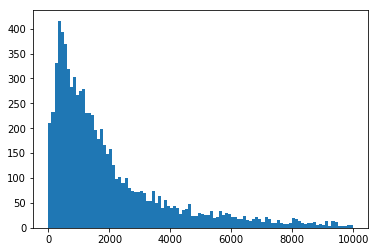

In [40]:
plt.hist(list(filter(lambda x: x < 10000, sum(linedef_counts, []))), bins=100)

In [41]:
sum(map_counts)

8310

In [42]:
sum(ok_map_counts)

19826

KeyboardInterrupt: 

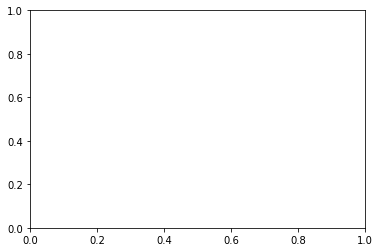

In [44]:
plt.hist(linedef_counts)